In [9]:
import tushare as ts
import pandas as pd
import numpy as np

# Initialize Tushare with your token
ts.set_token('046b208e5b01c16a89beda52d955f4b08c2dee86a9f244e90a0778c5')
pro = ts.pro_api()

# Fetch the list of all tickers
tickers_df = pro.stock_basic(exchange='', list_status='L', fields='ts_code')
tickers = tickers_df['ts_code'].tolist()

# Define the date range
start_date = '20230619'
end_date = '20230718'




In [10]:
print(tickers)

['000001.SZ', '000002.SZ', '000004.SZ', '000006.SZ', '000007.SZ', '000008.SZ', '000009.SZ', '000010.SZ', '000011.SZ', '000012.SZ', '000014.SZ', '000016.SZ', '000017.SZ', '000019.SZ', '000020.SZ', '000021.SZ', '000023.SZ', '000025.SZ', '000026.SZ', '000027.SZ', '000028.SZ', '000029.SZ', '000030.SZ', '000031.SZ', '000032.SZ', '000034.SZ', '000035.SZ', '000036.SZ', '000037.SZ', '000039.SZ', '000040.SZ', '000042.SZ', '000045.SZ', '000048.SZ', '000049.SZ', '000050.SZ', '000055.SZ', '000056.SZ', '000058.SZ', '000059.SZ', '000060.SZ', '000061.SZ', '000062.SZ', '000063.SZ', '000065.SZ', '000066.SZ', '000068.SZ', '000069.SZ', '000070.SZ', '000078.SZ', '000088.SZ', '000089.SZ', '000090.SZ', '000096.SZ', '000099.SZ', '000100.SZ', '000151.SZ', '000153.SZ', '000155.SZ', '000156.SZ', '000157.SZ', '000158.SZ', '000159.SZ', '000166.SZ', '000301.SZ', '000333.SZ', '000338.SZ', '000400.SZ', '000401.SZ', '000402.SZ', '000403.SZ', '000404.SZ', '000407.SZ', '000408.SZ', '000409.SZ', '000410.SZ', '000411.SZ'

In [11]:
print(len(tickers))

5359


In [13]:
# Function to fetch the closing prices
def fetch_closing_prices(tickers, start_date, end_date):
    all_data = {}
    for ticker in tickers:
        try:
            df = pro.daily(ts_code=ticker, start_date=start_date, end_date=end_date)
            df = df[['trade_date', 'close']].sort_values('trade_date').reset_index(drop=True)
            all_data[ticker] = df['close']
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return pd.DataFrame(all_data)

# Fetch the closing prices
closing_prices = fetch_closing_prices(tickers, start_date, end_date)

# Drop columns with any NaN values (if there are tickers without data)
closing_prices = closing_prices.dropna(axis=1)

# Calculate log returns
log_returns = np.log(closing_prices / closing_prices.shift(1)).dropna()

#

In [14]:
# Transpose the log returns DataFrame
log_returns_transposed = log_returns.transpose()
cov_matrix = np.cov(log_returns_transposed)
print(len(cov_matrix))

5127


In [15]:
print(cov_matrix)

[[ 9.40658980e-05  7.22045617e-05  6.13578102e-05 ...  7.68760227e-06
   1.00979558e-04 -5.38636165e-05]
 [ 7.22045617e-05  1.57301901e-04  1.58420102e-04 ...  6.85256644e-06
  -3.98363398e-05 -2.37755205e-05]
 [ 6.13578102e-05  1.58420102e-04  2.63747864e-04 ...  3.79565346e-05
  -3.16729424e-04 -8.39589937e-05]
 ...
 [ 7.68760227e-06  6.85256644e-06  3.79565346e-05 ...  4.37058973e-05
  -1.39312462e-04 -3.67926861e-05]
 [ 1.00979558e-04 -3.98363398e-05 -3.16729424e-04 ... -1.39312462e-04
   5.00759810e-03  6.55345918e-04]
 [-5.38636165e-05 -2.37755205e-05 -8.39589937e-05 ... -3.67926861e-05
   6.55345918e-04  4.58568756e-04]]


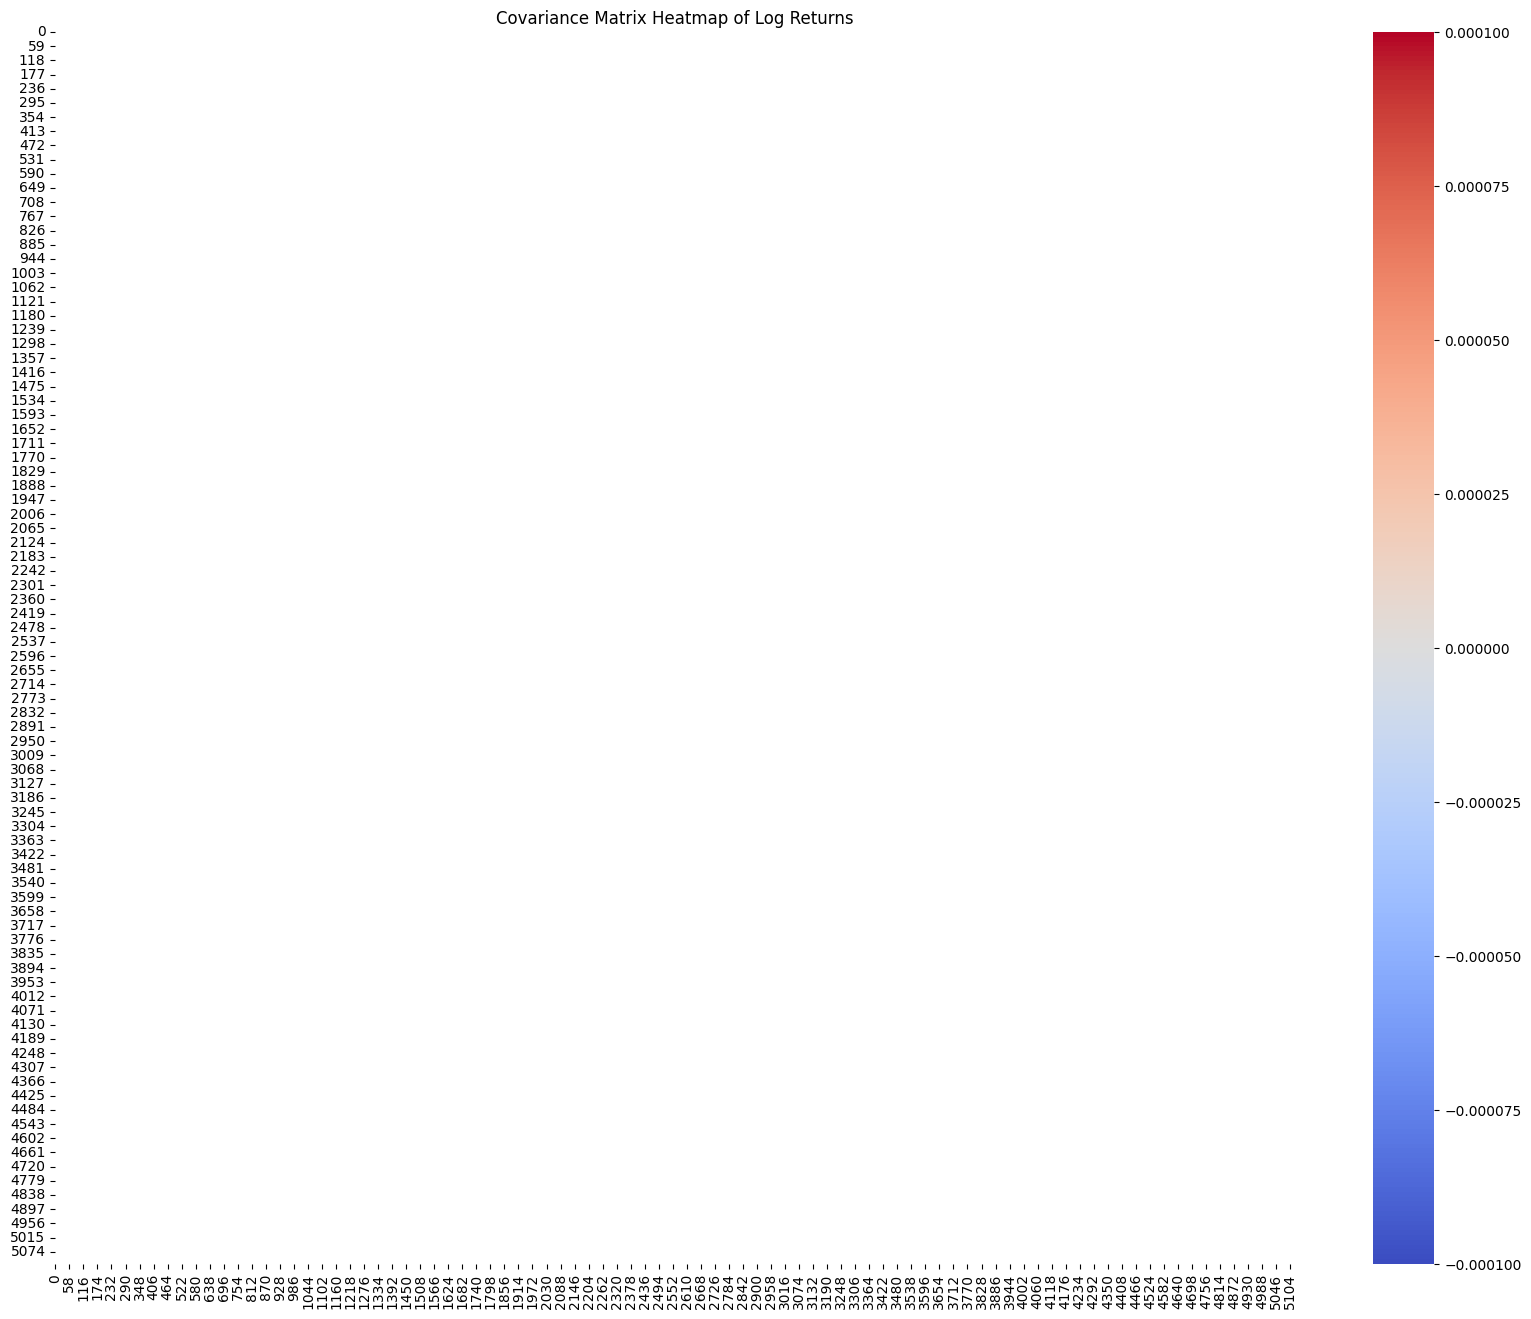

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(cov_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=.5, vmin=-0.0001, vmax=0.0001)
plt.title('Covariance Matrix Heatmap of Log Returns')
plt.show()

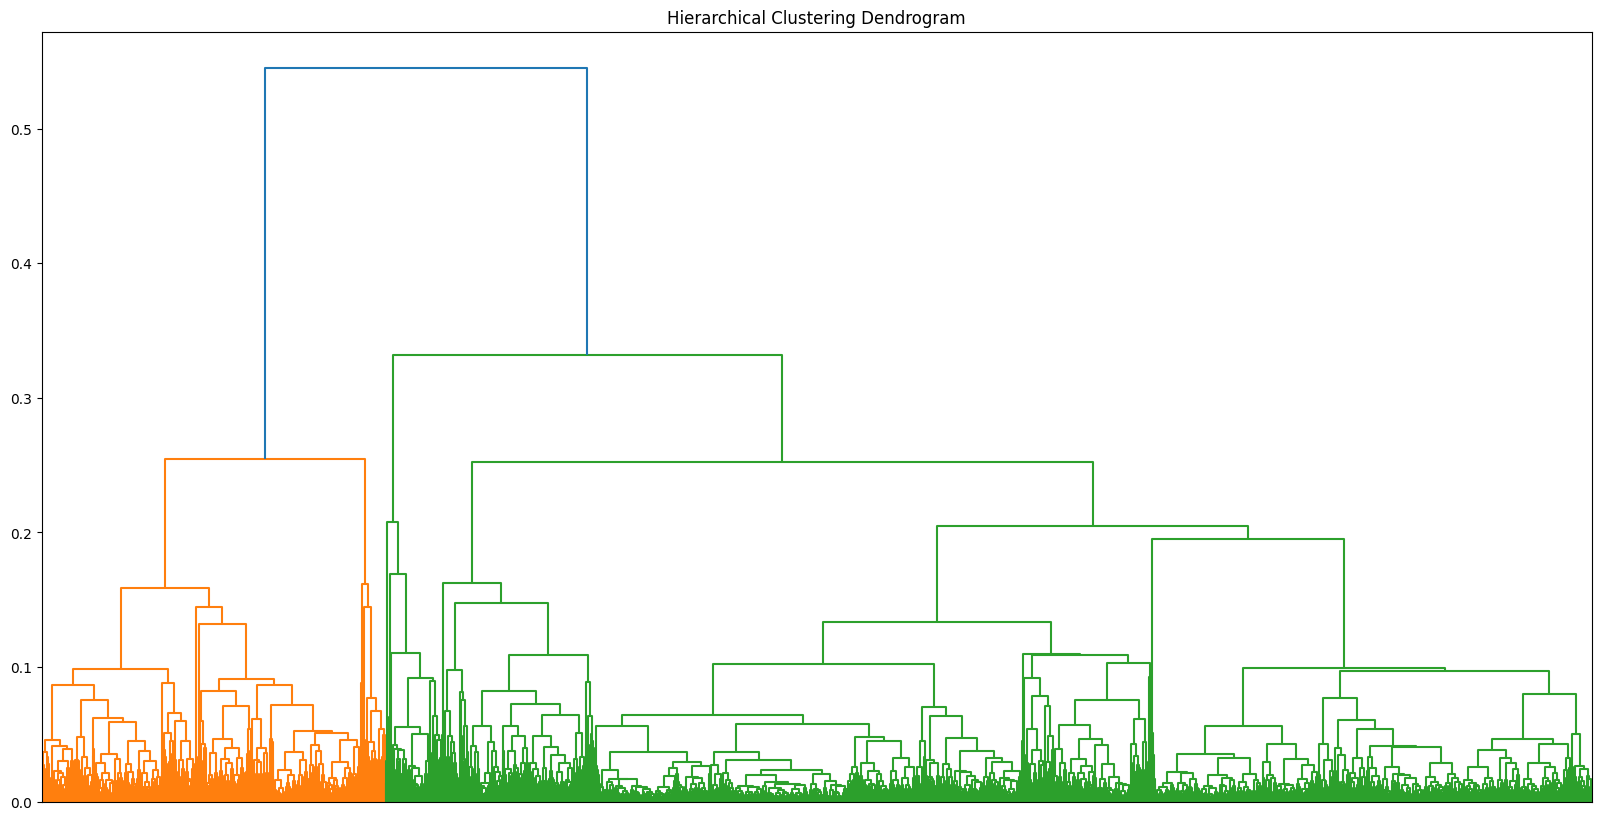

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Perform hierarchical clustering
Z = linkage(cov_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Select a subset of the data based on clustering
# For simplicity, let's take the first 50 tickers after clustering
indices = dendrogram(Z, no_plot=True)['leaves'][:50]
subset_cov_matrix = cov_matrix.iloc[indices, indices]

# Plot the heatmap of the subset covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(subset_cov_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=.5)
plt.title('Subset Covariance Matrix Heatmap of Log Returns')
plt.show()

In [ ]:
tickers_3 = ['000001.SZ', '000002.SZ', '000003.SZ']  # Add your tickers here

# Fetch the closing prices
closing_prices_3 = fetch_closing_prices(tickers_3, start_date, end_date)

# Drop columns with any NaN values (if there are tickers without data)
closing_prices_3 = closing_prices_3.dropna(axis=1)

# Calculate log returns
log_returns_3 = np.log(closing_prices_3 / closing_prices_3.shift(1)).dropna()

# Transpose the log returns DataFrame
log_returns_transposed_3 = log_returns.transpose()

# Select the first two or three rows (in this case, we select three for example)
selected_log_returns_3 = log_returns_transposed.iloc[:3]

# Calculate the covariance matrix for the selected rows
cov_matrix_3 = np.cov(selected_log_returns_3)

# Print the covariance matrix
print("Covariance Matrix for the selected log returns:")
print(cov_matrix_3)

Covariance Matrix for the selected log returns:
[[9.40658980e-05 7.22045617e-05 6.13578102e-05]
 [7.22045617e-05 1.57301901e-04 1.58420102e-04]
 [6.13578102e-05 1.58420102e-04 2.63747864e-04]]


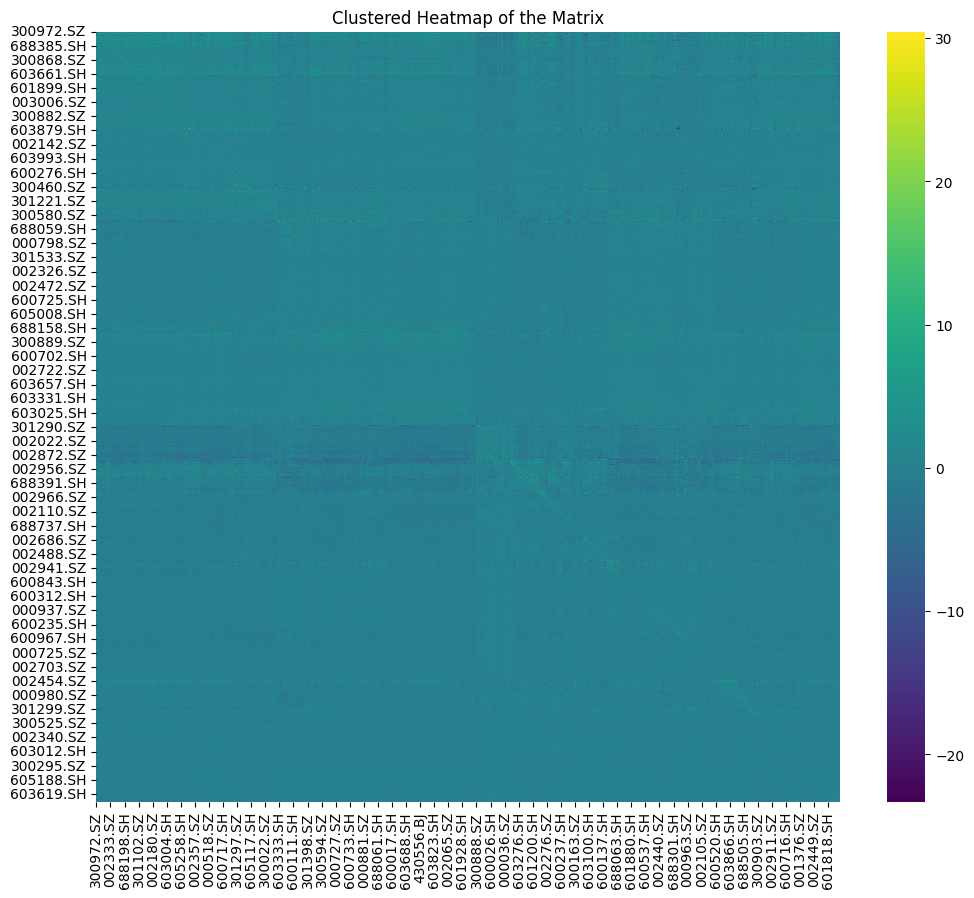

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from sklearn.preprocessing import StandardScaler

# Standardize the matrix
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(cov_matrix)

# Perform hierarchical clustering
Z = linkage(matrix_scaled, method='ward')

# Get the order of the leaves after clustering
leaves_order = leaves_list(Z)

# Reorder the matrix and tickers based on the clustering
matrix_clustered = matrix_scaled[leaves_order, :][:, leaves_order]
tickers_clustered = [tickers[i] for i in leaves_order]

# Create a DataFrame for the clustered matrix
df_clustered = pd.DataFrame(matrix_clustered, index=tickers_clustered, columns=tickers_clustered)

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_clustered, cmap='viridis')
plt.title('Clustered Heatmap of the Matrix')
plt.show()